## Load required modules.

In [1]:
%matplotlib widget
# Import ncessary modules.
from sklearn.decomposition import PCA
import xlrd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import ipywidgets 
from ipywidgets import interact, IntSlider
import ipywidgets as widgets
from matplotlib import pyplot
from IPython.display import display, clear_output, Javascript
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import FunctionTransformer

from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.pipeline import Pipeline
import gc
import psutil


import customtkinter as ctk
import tkinter as tk
from tkinter import ttk
from tkinter import filedialog as fd
from tkinter import *

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
from tkinter import IntVar
from tkinter import Menu

In [2]:
# window = ctk.CTk()

# #window
# window.title('MineralAI')
# window.geometry('1100x800')

# #widgets


# window.mainloop()

In [ ]:
class main(ctk.CTk):
    def __init__(self):
        super().__init__()
        self.title("MineralAI")
        self.geometry("1600x1600")
        
        self.filtered_df = pd.DataFrame()
        self.create_widgets()
    
    def create_widgets(self):
        self.toolbox_frame = ctk.CTkFrame(self, height=20)
        self.toolbox_frame.grid(row=0, column=0, columnspan=4, sticky="ew", padx=5, pady=(5,0))
    

        self.legend_frame = ctk.CTkFrame(self, width=250, height = 200)
        #self.output_frame.pack_propagate(False)
        self.legend_frame.grid(row=1, column=3, padx=5, pady=(5,0))
    
        self.box_frame = ctk.CTkFrame(self, width=150)
        self.box_frame.grid(row=1, column=0, rowspan=2, sticky="ns", padx=5, pady=5)
    
        self.box_frame_sub = ctk.CTkFrame(self, width=150)
        self.box_frame_sub.grid(row=1, column=1, rowspan=2, sticky="ns", pady=5)
    
        self.bargraph_frame = ctk.CTkFrame(self)
        self.bargraph_frame.grid(row=1, column=2, rowspan=2, sticky="nsew", pady=5, padx=(5,0))
        
        self.output_frame = ctk.CTkFrame(self, width=250)
        self.output_frame.pack_propagate(False)
        self.output_frame.grid(row=2, column=3, sticky="nsew", padx=5, pady=5)
        
        self.grid_columnconfigure(2, weight=1)
        self.grid_rowconfigure(2, weight=1)
        


        self.current_button = None

        self.select_litho_button = ctk.CTkButton(self.toolbox_frame, text="Open a File", command=self.load_data)
        self.select_litho_button.pack(side="left", padx = 5, pady = 3)

        # self.lithology_label = ctk.CTkLabel(self.selection_frame, text="Select Lithologies:")
        # self.lithology_label.pack(side="left", padx=5)
        
        self.lithology_listbox = tk.Listbox(self.box_frame, selectmode=tk.MULTIPLE)
        self.lithology_listbox.pack(side="top", fill = "x", padx = 5, pady = 5)

        self.apply_button = ctk.CTkButton(self.box_frame, text="Apply", command=lambda: self.on_button_click(self.apply_button, self.filter_dataframe))
        self.apply_button.pack(side="top", pady = (0,5))

        self.output_text = tk.Text(self.output_frame, wrap="word")
        self.output_text.pack(fill="both", expand=True)
        

        menubar = Menu(self)
        filemenu = Menu(menubar, tearoff=0)
        filemenu.add_command(label="New", command=self.load_data)
        filemenu.add_command(label="Open", command=None)
        filemenu.add_command(label="Save", command=None)
        filemenu.add_separator()
        filemenu.add_command(label="Exit", command=self.quit)
        menubar.add_cascade(label="File", menu=filemenu)
        
        helpmenu = Menu(menubar, tearoff=0)
        helpmenu.add_command(label="Help Index", command=None)
        helpmenu.add_command(label="About...", command=None)
        menubar.add_cascade(label="Help", menu=helpmenu)
        self.config(menu=menubar)



    def on_button_click(self, button, command):
        if self.current_button is not None:
            self.current_button.configure(fg_color='#3B8ED0') 

        button.configure(fg_color="grey")
        self.current_button = button

        command()


    def clear(self):
        for widget in self.winfo_children():
            if isinstance(widget, ctk.CTkEntry) or isinstance(widget, tk.Entry):
                widget.delete(0, 'end')
            elif isinstance(widget, tk.Listbox):
                widget.delete(0, tk.END)
            elif isinstance(widget, tk.Text):
                widget.delete('1.0', tk.END)

    def load_data(self):
        self.clear()
        try:
            #file_path = fd.askopenfilename()
            self.file_path = 'Geochemistry Results-AGG reduced variables.xlsx'
            self.sheet_name = 'Litogeochemistry - clean'
            self.df_0 = pd.read_excel(self.file_path, sheet_name=self.sheet_name)

            lithologies = self.df_0['Lithology'].unique()
            for lithology in lithologies:
                self.lithology_listbox.insert(tk.END, lithology)
        except:
            self.output_text.insert("end", "Invalid Selection\n")
    
    def filter_dataframe(self):
        selected_indices = self.lithology_listbox.curselection()
        selected_lithologies = [self.lithology_listbox.get(i) for i in selected_indices]
        self.filtered_df = self.df_0[self.df_0['Lithology'].isin(selected_lithologies)]
        self.remove_NaN()

    def remove_NaN(self):
        cleaned_df = self.filtered_df.iloc[:, 7:].replace('<', '', regex=True).astype(float)
        cleaned_df = cleaned_df[np.isfinite(cleaned_df).all(1)].dropna()
        self.df = cleaned_df
        self.update_output()
        self.print_pca()

    def update_output(self):
        self.output_text.delete(1.0, "end")
        self.output_text.insert("end", f"Filtered & Cleaned df:\n{self.df.head()}\n")
        self.output_text.insert("end", f"Filtered & Cleaned df:\n{self.df.shape}\n")
        
    def print_pca(self):
        try:
            self.pca_instance = PCA_class(self.df)
            self.output_text.insert("end", f"PCA performed successfully. Shape of transformed data: {self.pca_instance.x.shape}\n")
            self.output_text.insert("end", f"PCA Components:\n{self.pca_instance.pca_df.head()}\n")
            self.color_function()
            self.shape_map()
            self.loading_graph()
            
        except ValueError as e:
            self.output_text.insert("end", f"{e}\n")

    def color_function(self):
        self.dc = self.filtered_df['Lithology']
        
        self.dc = self.dc.to_frame()
        self.dc = self.dc.rename(columns={self.dc.columns[0]: 'Lithology'})
        
        # color_list = dc['Lithology'].unique()
        # default_colors = ["lime", "blue", "cyan", "deeppink", "pink", "black", "black", "black", "grey", "lightgrey"]
        # color_map = {}
        # # Populate the dictionary with symbols for each shape
        # for i, color in enumerate(color_list):
        #     if i < len(default_colors):
        #         color_map[color] = default_colors[i]
        
        self.color_map = {
            'Calcitic marble': 'lime',
            'Dolomitic marble': 'blue',
            'Di-Tr dolomitic marble': 'cyan',
            'Carbonatite': 'deeppink',
            'Carbonatite-like': 'pink',
            'Syenite': 'black',
            'Altered Syenite': 'black',
            'Syenite-like': 'black',
            'Impure Siliciclastic': 'grey',
            'Pure Siliciclastic': 'lightgrey'
        }
        
        self.dc['Color'] = self.dc['Lithology'].map(self.color_map)

        self.output_text.insert("end", self.dc)

    def shape_map(self):
        self.ds = self.filtered_df.iloc[:, 4]
        self.ds = self.ds.to_frame()
        self.ds = self.ds.rename(columns={self.ds.columns[0]: 'Shape'})
        
        # shape_list = ds['Shape'].unique()
        # default_symbols = ["^", "*", "o", "s", "D"]
        # color_map1 = {}
        # # Populate the dictionary with symbols for each shape
        # for i, shape in enumerate(shape_list):
        #     if i < len(default_symbols):
        #         color_map1[shape] = default_symbols[i]
        
        self.color_map1 = {
            'Marble Units': "^",
            'Altered Intrusion': "*",
            'Siliciclastic': "o",
            'Intrusion': "s",
            'Anamolous Rock': "D",
        }
        
        self.ds["Shapes"] = self.ds["Shape"].map(self.color_map1)
        self.output_text.insert("end", self.ds)

            
    def loading_graph(self):
        loading_class(self.pca_instance, self.df, self.bargraph_frame, self.box_frame, self.box_frame_sub, self.on_button_click, self.apply_button)
        threed_class(self.pca_instance, self.df, self.bargraph_frame, self.box_frame, self.box_frame_sub, self.dc, self.ds, self.color_map, self.color_map1, self.on_button_click, self.apply_button, self.legend_frame)
        twod_class(self.pca_instance, self.df, self.bargraph_frame, self.box_frame, self.box_frame_sub, self.dc, self.ds, self.color_map, self.color_map1, self.on_button_click, self.apply_button, self.legend_frame)
        Cluster2DPlotClass(self.df, self.file_path, self.sheet_name, self.bargraph_frame, self.box_frame, self.box_frame_sub, self.dc, self.on_button_click, self.apply_button)
        Cluster3DPlotClass(self.df, self.file_path, self.sheet_name, self.bargraph_frame, self.box_frame, self.box_frame_sub, self.on_button_click, self.apply_button, self.legend_frame)


class PCA_class:
    def __init__(self, df):
        self.df = df
        self.perform_pca()
        self.bargraph_frame = None
        
    def perform_pca(self):
        scaling=StandardScaler()
        #scaling = FunctionTransformer(np.log10, validate=True)
        try:
            scaling.fit(self.df)
            Scaled_data = scaling.transform(self.df)
            Scaled_df = pd.DataFrame(Scaled_data)
            
            self.pca = PCA(n_components=6)
            self.pca.fit(Scaled_data)
            self.x = self.pca.transform(Scaled_data)
            self.create_pca_df()
             
        except Exception as e:
            raise ValueError('Not enough components for PCA. Please select more!') from e

    def create_pca_df(self):  
        self.pca_df = pd.DataFrame(
            data=self.x, 
            columns=['PC'+str(i) for i in range(1, len(self.pca.components_)+1)]
        )
        self.scale_pca()
        
    def scale_pca(self):
        self.pca_df_scaled = self.pca_df.copy()
        scaler_df = self.pca_df[self.pca_df.columns]
        scaler = 1 / (scaler_df.max() - scaler_df.min())
        for index in scaler.index:
            self.pca_df_scaled[index] *= scaler[index]
            


class loading_class:
    def __init__(self, pca_instance, df, bargraph_frame, box_frame, box_frame_sub, on_button_click, apply_button):
        self.apply_button = apply_button
        self.on_button_click = on_button_click
        self.pca = pca_instance.pca
        self.df = df
        self.loadings = pd.DataFrame(self.pca.components_.T, columns=['PC'+str(i) for i in range(1, len(self.pca.components_)+1)], index=df.columns)
        self.bargraph_frame = bargraph_frame
        self.box_frame = box_frame
        self.box_frame_sub = box_frame_sub
        self.var = IntVar()
        #self.var.trace_add("write", self.check)
        self.Graph_PC()

    
        
    def Graph_PC(self):
        self.graph_bar_button = ctk.CTkButton(self.box_frame, text="Graph PC bar graph", command=lambda: self.on_button_click(self.graph_bar_button, self.Graph_PC_sub))
        self.graph_bar_button.pack(side="top", padx=5, pady=(15,0))
        
    def Graph_PC_sub(self):
        for widget in self.box_frame_sub.winfo_children():
            widget.destroy() 
            
        self.checkbox = ctk.CTkCheckBox(self.box_frame_sub, text="Sort Loadings", variable=self.var)
        self.checkbox.pack(side="top", anchor="w", padx=5, pady=3)
        
        self.apply_Graph_PC = ctk.CTkButton(self.box_frame_sub, text="apply", command = self.update_plots)
        self.apply_Graph_PC.pack(side="top", padx=5, pady=5)
        
        


    def normalize(self, values, vmin=None, vmax=None):
        vmin = vmin if vmin is not None else np.min(values)
        vmax = vmax if vmax is not None else np.max(values)
        norm_values = (values - vmin) / (vmax - vmin)
        return norm_values

    def plot_pc_barchart(self, data, pc_name, ax, sort):
        if sort:
            data = data.sort_values(ascending=False)
        norm_values = self.normalize(data, vmin=-max(abs(data)), vmax=max(abs(data)))
        bar_colors = plt.cm.coolwarm(norm_values)
        data.plot(kind='barh', color=bar_colors, ax=ax, fontsize="x-small")
        ax.set_title(pc_name)
        ax.grid(True, linestyle='--', linewidth=0.5)
        #ax.set_xlabel('')
        #ax.set_ylabel('Elements')

    def update_plots(self):
        sort = self.var.get() == 1
        plt.close('all')
        for widget in self.bargraph_frame.winfo_children():
            widget.destroy() 


        fig, axes = plt.subplots(ncols=len(self.loadings.columns), figsize=(12, 8))

        for i in range(len(self.loadings.columns)):
            self.plot_pc_barchart(self.loadings[f'PC{i+1}'], f'PC{i+1}', axes[i], sort)

        plt.tight_layout()

        fig_c = plt.figure(figsize=(12, 1))
        min_val = self.loadings.min().min()
        max_val = self.loadings.max().max()
        norm = plt.Normalize(vmin=min_val, vmax=max_val)
        cmap = plt.cm.coolwarm
        cbar = fig_c.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=axes, orientation='horizontal', fraction=0.02)

        canvas = FigureCanvasTkAgg(fig, master=self.bargraph_frame)
        canvas.draw()

        toolbar = NavigationToolbar2Tk(canvas, self.bargraph_frame)
        toolbar.update()
        toolbar.pack(side=tk.TOP, fill=tk.X)
        canvas.get_tk_widget().pack(side=ctk.TOP, fill=ctk.BOTH, expand=True)




class threed_class:    
    def __init__(self, pca_instance, df, bargraph_frame, box_frame, box_frame_sub, dc, ds, color_map, color_map1, on_button_click, apply_button, legend_frame):
        self.apply_button = apply_button
        self.on_button_click = on_button_click
        self.pca = pca_instance.pca
        self.pca_df_scaled = pca_instance.pca_df_scaled
        self.df = df
        self.dc = dc
        self.ds = ds
        self.color_map = color_map
        self.color_map1 = color_map1

        self.loadings = pd.DataFrame(self.pca.components_.T, columns=['PC'+str(i) for i in range(1, len(self.pca.components_)+1)], index=df.columns)
        self.bargraph_frame = bargraph_frame
        self.box_frame = box_frame
        self.box_frame_sub = box_frame_sub
        self.legend_frame = legend_frame
    
        self.var = IntVar()
        self.var1 = IntVar()
        # Plot 3D scatterplot of PCA
        #df = pd.read_excel(file_path, sheet_name=sheet_name)
        #description = df.iloc[:, 0]
        #descriptions = []
        dc.reset_index(drop=True, inplace=True)
        ds.reset_index(drop=True, inplace=True)
        self.plot_3d()

    def plot_3d(self):
        self.plot_3d_button = ctk.CTkButton(self.box_frame, text="Graph 3d", command=lambda: self.on_button_click(self.plot_3d_button, self.plot_3d_sub))
        self.plot_3d_button.pack(side="top", padx=5, pady=(5,0))
        
    def plot_3d_sub(self):
        for widget in self.box_frame_sub.winfo_children():
            widget.destroy() 
            
        self.checkbox = ctk.CTkCheckBox(self.box_frame_sub, text="Display shape", variable=self.var)
        self.checkbox.pack(side="top", anchor="w", padx=5, pady = (3,0))
        
        self.checkbox1 = ctk.CTkCheckBox(self.box_frame_sub, text="Display Legend", variable=self.var1)
        self.checkbox1.pack(side="top", anchor="w", padx=5, pady = (3,0))

        self.multiselect_3d = tk.Listbox(self.box_frame_sub, selectmode=tk.MULTIPLE)
        self.multiselect_3d.pack(side="top", padx=5, pady=5)
        for names in self.df.columns.tolist():
                self.multiselect_3d.insert(tk.END, names)
        
        self.apply_plot_3d = ctk.CTkButton(self.box_frame_sub, text="apply", command = self.show_shape)
        self.apply_plot_3d.pack(side="top", padx=5, pady=5)
                

        
    def show_shape(self): 
        plt.close('all')
        for widget in self.bargraph_frame.winfo_children():
            widget.destroy() 

    
            
        fig = plt.figure(figsize=(11, 11))
        self.ax = fig.add_subplot(111, projection='3d')
        xdata = self.pca_df_scaled['PC1']
        ydata = self.pca_df_scaled['PC2']
        zdata = self.pca_df_scaled['PC3'] 

        canvas = FigureCanvasTkAgg(fig, master=self.bargraph_frame)
        canvas.draw()
        
        toolbar = NavigationToolbar2Tk(canvas, self.bargraph_frame)
        toolbar.update()
        toolbar.pack(side=tk.TOP, fill=tk.X)
        canvas.get_tk_widget().pack(side=ctk.RIGHT, fill=ctk.Y)
        
        self.shapes1 = []
        for i in range(len(self.dc)):
            shape1 = self.ax.scatter3D(xdata[i], ydata[i], zdata[i], c=self.dc['Color'][i], marker=self.ds["Shapes"][i])
            self.shapes1.append(shape1)
            #text = ax.text(xdata[i], ydata[i], zdata[i], description[i], size=10, zorder=1, color='k')
            #descriptions.append(text)
        
        self.dots = self.ax.scatter3D(xdata, ydata, zdata, c=self.dc['Color'])

        self.setups()
        self.shape()
        self.legend()

        
    def shape(self):
        shape = self.var.get() == 1
        if shape:
            for shape1 in self.shapes1:
                shape1.set_visible(True)  
            self.dots.set_visible(False) 
        else:
            self.dots.set_visible(True)
            for shape1 in self.shapes1:
                shape1.set_visible(False)
        
    def legend(self):
        for widget in self.legend_frame.winfo_children():
            widget.destroy()
        handle1 = []
        label1 = []
        for lithology, color in self.color_map.items():
            l1 = self.ax.scatter([], [], c=color, label=lithology)
            handle1.append(l1)
            label1.append(lithology)
        
        handle2 = []
        label2 = []
        for shape, shapes in self.color_map1.items():
            l2 = self.ax.scatter([], [], c="black", marker=shapes, label=shape)
            handle2.append(l2)
            label2.append(shape)
                    
        total_entries = len(label1) + len(label2)
        height_per_entry = 0.25
        fig_height = total_entries * height_per_entry
            
        figx = plt.figure(figsize=(2.5, fig_height))
        axx = figx.add_subplot(111)
        axx.axis('off')
    
        
        self.legend1 = pyplot.legend(handle1, label1, bbox_to_anchor = (0.9,1.1), title='Lithology', fontsize='x-small')
        self.legend2 = pyplot.legend(handle2, label2, bbox_to_anchor = (0.9,0.3), title='Shapes', fontsize='x-small')
        axx.add_artist(self.legend1)
        axx.add_artist(self.legend2)
        self.canvas1 = FigureCanvasTkAgg(figx, master=self.legend_frame)
        self.canvas1.get_tk_widget().pack(fill="both", expand=True)
        
        self.legend1.set_visible(False)
        self.legend2.set_visible(False)
        self.legenda()
        
    def legenda(self):
        Legend = self.var1.get() == 1
        if Legend:
            self.legend1.set_visible(True)  
            self.legend2.set_visible(True)
        else:
            self.legend1.set_visible(False)
            self.legend2.set_visible(False)

    

    def setups(self):
        
        #set up loadings
        self.show_names=self.df.columns.tolist()
        self.indx=self.df.columns.get_indexer(self.show_names)
        scale=2
        
        # Define the x, y, z variables
        loadings_1 = self.pca.components_
        self.xs = scale*loadings_1[0]
        self.ys = scale*loadings_1[1]
        self.zs = scale*loadings_1[2]  
        # Plot title of graph
        plt.title(f'3D Biplot')
          
        # Plot x, y, z labels
        self.ax.set_xlabel('PC1')
        self.ax.set_ylabel('PC2')
        self.ax.set_zlabel('PC3')
        x_arr = np.zeros(len(loadings_1[0]))
        y_arr = z_arr = x_arr
        
        all_points = np.concatenate((self.xs, self.ys, self.zs))
        min_value = np.min(all_points)
        max_value = np.max(all_points)
        axis_range = [min_value, max_value]
        
        self.ax.plot([x_arr.any() + axis_range[0], x_arr.any() + axis_range[1]], [y_arr.any(), y_arr.any()], [z_arr.any(), z_arr.any()], color='k', linestyle='--')
        self.ax.plot([x_arr.any(), x_arr.any()], [y_arr.any() + axis_range[0], y_arr.any() + axis_range[1]], [z_arr.any(), z_arr.any()], color='k', linestyle='--') 
        self.ax.plot([x_arr.any(), x_arr.any()], [y_arr.any(), y_arr.any()], [z_arr.any() + axis_range[0], z_arr.any() + axis_range[1]], color='k', linestyle='--')
        
        self.arrow_list = []
        
        #show_arrows = ax.quiver(x_arr[indx], y_arr[indx], z_arr[indx], xs[indx], ys[indx], zs[indx],color='r')
        for i, name in enumerate(self.df.columns):
            ip = self.df.columns.get_loc(name)
            arrow = self.ax.quiver(x_arr[ip], y_arr[ip], z_arr[ip], self.xs[ip], self.ys[ip], self.zs[ip], color='r', arrow_length_ratio = 0.1, linewidth=0.5)
            self.arrow_list.append(arrow)
            
        # Plot the loadings
        self.namelist = []
        for i , names in enumerate(self.show_names):
            ip=self.indx[i]
            #ax.scatter(xs[ip], ys[ip], zs[ip], s=100)
            n = self.ax.text(self.xs[ip]+0.02, self.ys[ip]+0.02, self.zs[ip]+0.02, names, fontsize='small')
            self.namelist.append(n)

        selected_indices = self.multiselect_3d.curselection()
        self.selected_items = [self.multiselect_3d.get(i) for i in selected_indices]
        self.findname_specific()
     
    def findname_specific(self):
        options = self.df.columns.tolist()
        for i in range(len(options[:])):  
            if options[i] in self.selected_items:
                self.namelist[i].set_visible(True)
                self.arrow_list[i].set_visible(True)
            else:
                self.namelist[i].set_visible(False)
                self.arrow_list[i].set_visible(False)
    


class twod_class:
    def __init__(self, pca_instance, df, bargraph_frame, box_frame, box_frame_sub, dc, ds, color_map, color_map1, on_button_click, apply_button, legend_frame):
        self.pca = pca_instance.pca
        self.pca_df_scaled = pca_instance.pca_df_scaled
        self.df = df
        self.dc = dc
        self.ds = ds
        self.color_map = color_map
        self.color_map1 = color_map1

        self.bargraph_frame = bargraph_frame
        self.box_frame = box_frame
        self.box_frame_sub = box_frame_sub

        self.var = IntVar()
        self.var1 = IntVar()
        self.on_button_click = on_button_click
        self.apply_button = apply_button
        
        self.plot_2d()

    def plot_2d(self):
        self.plot_2d_button = ctk.CTkButton(self.box_frame, text="Graph 2D", command=lambda: self.on_button_click(self.plot_2d_button, self.plot_2d_sub))
        self.plot_2d_button.pack(side="top", padx=5, pady=(5,0))

    def plot_2d_sub(self):
        for widget in self.box_frame_sub.winfo_children():
            widget.destroy()

        self.pc1_var = tk.StringVar()
        self.pc2_var = tk.StringVar()

        pc_options = [f'PC{i+1}' for i in range(len(self.pca.components_))]
        
        ttk.Label(self.box_frame_sub, text="Select PC1:").pack(side="top", padx=5, pady=(5,0))
        self.pc1_combo = ttk.Combobox(self.box_frame_sub, textvariable=self.pc1_var, values=pc_options)
        self.pc1_combo.current(0)
        self.pc1_combo.pack(side="top", padx=5, pady=(5,0))
        
        ttk.Label(self.box_frame_sub, text="Select PC2:").pack(side="top", padx=5, pady=(5,0))
        self.pc2_combo = ttk.Combobox(self.box_frame_sub, textvariable=self.pc2_var, values=pc_options)
        self.pc2_combo.current(1)
        self.pc2_combo.pack(side="top", padx=5, pady=(5,0))

        self.checkbox = ctk.CTkCheckBox(self.box_frame_sub, text="Display shape", variable=self.var)
        self.checkbox.pack(side="top", anchor="w", padx=5, pady=(3,0))
        
        self.checkbox1 = ctk.CTkCheckBox(self.box_frame_sub, text="Display Legend", variable=self.var1)
        self.checkbox1.pack(side="top", anchor="w", padx=5, pady=(3,0))

        self.multiselect_2d = tk.Listbox(self.box_frame_sub, selectmode=tk.MULTIPLE)
        self.multiselect_2d.pack(side="top", padx=5, pady=5)
        for names in self.df.columns.tolist():
            self.multiselect_2d.insert(tk.END, names)

        self.apply_plot_2d = ctk.CTkButton(self.box_frame_sub, text="apply", command=self.show_shape)
        self.apply_plot_2d.pack(side="top", padx=5, pady=5)

    def show_shape(self):
        plt.close('all')
        for widget in self.bargraph_frame.winfo_children():
            widget.destroy()

        pc1 = self.pc1_var.get()
        pc2 = self.pc2_var.get()

        xdata = self.pca_df_scaled[pc1]
        ydata = self.pca_df_scaled[pc2]

        fig = plt.figure(figsize=(10, 9))
        self.ax1 = fig.add_subplot(111)

        self.shapes2 = []
        for i in range(len(self.df)):
            shape2 = self.ax1.scatter(xdata[i], ydata[i], c=self.dc['Color'][i], marker=self.ds["Shapes"][i])
            self.shapes2.append(shape2)
        
        self.dots2 = self.ax1.scatter(xdata, ydata, c=self.dc['Color'])

        canvas = FigureCanvasTkAgg(fig, master=self.bargraph_frame)
        canvas.draw()
        
        toolbar = NavigationToolbar2Tk(canvas, self.bargraph_frame)
        toolbar.update()
        toolbar.pack(side=tk.TOP, fill=tk.X)
        canvas.get_tk_widget().pack(side=ctk.RIGHT, fill=ctk.Y)
        
        self.setups(pc1, pc2)
        self.shape()
        self.legend()



    def shape(self):
        shape = self.var.get() == 1
        if shape:
            for shape2 in self.shapes2:
                shape2.set_visible(True)
            self.dots2.set_visible(False)
        else:
            self.dots2.set_visible(True)
            for shape2 in self.shapes2:
                shape2.set_visible(False)

    def legend(self):
        figx = plt.figure(figsize=(2, 8))
        axx = figx.add_subplot(111)
        axx.axis('off')
        
        handle3 = []
        label3 = []
        for lithology, color in self.color_map.items():
            l3 = self.ax1.scatter([], [], c=color, label=lithology)
            handle3.append(l3)
            label3.append(lithology)
        
        handle4 = []
        label4 = []
        for shape, shapes in self.color_map1.items():
            l4 = self.ax1.scatter([], [], c="black", marker=shapes, label=shape)
            handle4.append(l4)
            label4.append(shape)
        
        self.legend3 = plt.legend(handle3, label3, loc="upper left", title='Lithology', fontsize='x-small')
        self.legend4 = plt.legend(handle4, label4, loc="lower left", title='Shapes', fontsize='x-small')
        axx.add_artist(self.legend3)
        axx.add_artist(self.legend4)
        self.canvas1 = FigureCanvasTkAgg(figx, master=self.bargraph_frame)
        self.canvas1.get_tk_widget().pack(side="left", fill="both", expand=True)

        self.legend3.set_visible(False)
        self.legend4.set_visible(False)
        self.legenda()

    def legenda(self):
        Legend = self.var1.get() == 1
        if Legend:
            self.legend3.set_visible(True)
            self.legend4.set_visible(True)
        else:
            self.legend3.set_visible(False)
            self.legend4.set_visible(False)

    def setups(self, pc1, pc2):
        show_names = self.df.columns.tolist()
        indx = self.df.columns.get_indexer(show_names)
        
        loadings = self.pca.components_
        pc1_index = int(pc1[2:]) - 1
        pc2_index = int(pc2[2:]) - 1
        xs = loadings[pc1_index]
        ys = loadings[pc2_index]

        arrow_list_2d = []
        
        x_arr = np.zeros(len(loadings[0]))
        y_arr = x_arr

        plt.axhline(y=y_arr.any(), color='k', linestyle='--')
        plt.axvline(x=x_arr.any(), color='k', linestyle='--')
        
        arrow_scale = 1.2
        
        for i, name in enumerate(self.df.columns):
            ip = self.df.columns.get_loc(name)
            arrow_2d = self.ax1.quiver(x_arr[ip], y_arr[ip], xs[ip], ys[ip], color='r', scale=arrow_scale, width=0.002)
            arrow_list_2d.append(arrow_2d)
        
        namelist_2d = []
        for i, names in enumerate(show_names):
            ip = indx[i]
            n = self.ax1.text((1)*xs[ip], (1)*ys[ip], names, fontsize='small')
            namelist_2d.append(n)

        selected_indices = self.multiselect_2d.curselection()
        self.selected_items = [self.multiselect_2d.get(i) for i in selected_indices]
        self.findname_specific_2d(namelist_2d, arrow_list_2d)

        
        plt.xlabel(pc1)
        plt.ylabel(pc2)
        plt.title(f"{pc1} vs {pc2}")

    def findname_specific_2d(self, namelist_2d, arrow_list_2d):
        options = self.df.columns.tolist()
        for i in range(len(options[:])):
            if options[i] in self.selected_items:
                namelist_2d[i].set_visible(True)
                arrow_list_2d[i].set_visible(True)
            else:
                namelist_2d[i].set_visible(False)
                arrow_list_2d[i].set_visible(False)

class Cluster2DPlotClass:
    def __init__(self, df, file_path, sheet_name, bargraph_frame, box_frame, box_frame_sub, dc, on_button_click, apply_button):
        self.df = df.dropna()
        self.file_path = file_path
        self.sheet_name = sheet_name
        self.bargraph_frame = bargraph_frame
        self.box_frame = box_frame
        self.box_frame_sub = box_frame_sub
        self.dc = dc
        self.on_button_click = on_button_click
        self.apply_button = apply_button

        self.max_Zn = self.df['Zn_ppm'].max()
        self.min_Zn = self.df['Zn_ppm'].min()
        
        self.plot_2d_cluster()

    def plot_2d_cluster(self):
        self.plot_2d_cluster_button = ctk.CTkButton(self.box_frame, text="Cluster 2D", command=lambda: self.on_button_click(self.plot_2d_cluster_button, self.plot_2d_cluster_sub))
        self.plot_2d_cluster_button.pack(side="top", padx=5, pady=(5, 0))

    def plot_2d_cluster_sub(self):
        for widget in self.box_frame_sub.winfo_children():
            widget.destroy()

        ttk.Label(self.box_frame_sub, text="Select Axis 1:").pack(side="top", padx=5, pady=(5, 0))
        self.axis1_combo = ttk.Combobox(self.box_frame_sub, values=self.df.columns.tolist())
        self.axis1_combo.current(0)
        self.axis1_combo.pack(side="top", padx=5, pady=(5, 0))
        
        ttk.Label(self.box_frame_sub, text="Select Axis 2:").pack(side="top", padx=5, pady=(5, 0))
        self.axis2_combo = ttk.Combobox(self.box_frame_sub, values=self.df.columns.tolist())
        self.axis2_combo.current(1)
        self.axis2_combo.pack(side="top", padx=5, pady=(5, 0))

        ttk.Label(self.box_frame_sub, text="Number of Clusters:").pack(side="top", padx=5, pady=(5, 0))
        self.k_slider = tk.Scale(self.box_frame_sub, from_=2, to=10, orient=tk.HORIZONTAL)
        self.k_slider.pack(side="top", padx=5, pady=(5, 0))

        self.apply_plot_2d_cluster = ctk.CTkButton(self.box_frame_sub, text="Apply", command=self.show_cluster)
        self.apply_plot_2d_cluster.pack(side="top", padx=5, pady=5)

    def show_cluster(self):
        plt.close('all')
        for widget in self.bargraph_frame.winfo_children():
            widget.destroy()

        axis1 = self.axis1_combo.get()
        axis2 = self.axis2_combo.get()
        k = self.k_slider.get()

        if axis1 != axis2:
            self.df[axis1] = self.df[axis1].apply(lambda x: x.replace('<', '') if isinstance(x, str) and '<' in x else x).astype(float)
            self.df[axis2] = self.df[axis2].apply(lambda x: x.replace('<', '') if isinstance(x, str) and '<' in x else x).astype(float)
            
            X = self.df[[axis1, axis2]].values

            pipe = Pipeline([
                ("scale", StandardScaler()),
                ("model", KMeans(n_clusters=k, random_state=0, n_init='auto'))
            ])
            
            pipe.fit(X)
            self.df['cluster'] = pipe.named_steps['model'].labels_

            x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
            y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                                 np.arange(y_min, y_max, 0.01))
            
            Z = pipe.named_steps['model'].predict(pipe.named_steps['scale'].transform(np.c_[xx.ravel(), yy.ravel()]))
            Z = Z.reshape(xx.shape)

            fig, ax = plt.subplots(figsize=(9, 7))
            ax.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.2)

            def map_size(x, new_min, new_max):
                old_min = self.min_Zn
                old_max = self.max_Zn
                return ((np.log(x + 1) - np.log(old_min + 1)) / (np.log(old_max + 1) - np.log(old_min + 1))) * (new_max - new_min) + new_min
            
            palette = sns.color_palette("hsv", k)
            sns.scatterplot(data=self.df, x=axis1, y=axis2, hue=self.df['cluster'], palette=palette, s=self.df['Zn_ppm'].apply(lambda x: map_size(x, 20, 100)), ax=ax)
            
            dd = pd.read_excel(self.file_path, sheet_name=self.sheet_name)
            self.df.apply(lambda row: ax.text(row[axis1], row[axis2] + 0.1, dd.iloc[row.name, 0], fontsize=7, ha='center'), axis=1)
            
            scaler = pipe.named_steps['scale']
            centroids = pipe.named_steps['model'].cluster_centers_
            centroids_original = scaler.inverse_transform(centroids)
            
            ax.scatter(centroids_original[:, 0], centroids_original[:, 1], 
                       marker="X", c="red", s=30, label="centroids")

            ax.legend()
            ax.set_title("K-Means Clustering")

            canvas = FigureCanvasTkAgg(fig, master=self.bargraph_frame)
            canvas.draw()
            
            toolbar = NavigationToolbar2Tk(canvas, self.bargraph_frame)
            toolbar.update()
            toolbar.pack(side=tk.TOP, fill=tk.X)
            canvas.get_tk_widget().pack(side=ctk.RIGHT, fill=ctk.Y)

class Cluster3DPlotClass:
    def __init__(self, df, file_path, sheet_name, bargraph_frame, box_frame, box_frame_sub, on_button_click, apply_button, legend_frame):
        self.df = df.dropna()
        self.file_path = file_path
        self.sheet_name = sheet_name
        self.bargraph_frame = bargraph_frame
        self.box_frame = box_frame
        self.box_frame_sub = box_frame_sub
        self.legend_frame = legend_frame
        self.dd = pd.read_excel(file_path, sheet_name=sheet_name)
        self.on_button_click = on_button_click
        self.apply_button = apply_button

        self.plot_3d_cluster()

    def plot_3d_cluster(self):
        self.plot_3d_cluster_button = ctk.CTkButton(self.box_frame, text="Cluster 3D", command=lambda: self.on_button_click(self.plot_3d_cluster_button, self.plot_3d_cluster_sub))
        self.plot_3d_cluster_button.pack(side="top", padx=5, pady=(5, 0))

    def plot_3d_cluster_sub(self):
        for widget in self.box_frame_sub.winfo_children():
            widget.destroy()

        ttk.Label(self.box_frame_sub, text="Select Axis 1:").pack(side="top", padx=5, pady=(5, 0))
        self.axis1_combo = ttk.Combobox(self.box_frame_sub, values=self.df.columns.tolist())
        self.axis1_combo.current(0)
        self.axis1_combo.pack(side="top", padx=5, pady=(5, 0))
        
        ttk.Label(self.box_frame_sub, text="Select Axis 2:").pack(side="top", padx=5, pady=(5, 0))
        self.axis2_combo = ttk.Combobox(self.box_frame_sub, values=self.df.columns.tolist())
        self.axis2_combo.current(2)
        self.axis2_combo.pack(side="top", padx=5, pady=(5, 0))

        ttk.Label(self.box_frame_sub, text="Select Axis 3:").pack(side="top", padx=5, pady=(5, 0))
        self.axis3_combo = ttk.Combobox(self.box_frame_sub, values=self.df.columns.tolist())
        self.axis3_combo.current(4)
        self.axis3_combo.pack(side="top", padx=5, pady=(5, 0))

        ttk.Label(self.box_frame_sub, text="Number of Clusters:").pack(side="top", padx=5, pady=(5, 0))
        self.k_slider = tk.Scale(self.box_frame_sub, from_=2, to=10, orient=tk.HORIZONTAL)
        self.k_slider.pack(side="top", padx=5, pady=(5, 0))

        self.apply_plot_3d_cluster = ctk.CTkButton(self.box_frame_sub, text="Apply", command=self.show_cluster)
        self.apply_plot_3d_cluster.pack(side="top", padx=5, pady=5)

        self.yellowbrick()


    def yellowbrick(self):
        
        axis1 = self.axis1_combo.get()
        axis2 = self.axis2_combo.get()
        axis3 = self.axis3_combo.get()
        k = self.k_slider.get()

        if axis1 != axis2 and axis1 != axis3 and axis2 != axis3:
            for col in [axis1, axis2, axis3]:
                self.df[col] = self.df[col].apply(lambda x: x.replace('<', '') if isinstance(x, str) and '<' in x else x)
            self.df = self.df.astype({axis1: 'float', axis2: 'float', axis3: 'float'})

            X = self.df[[axis1, axis2, axis3]].values
            
        from yellowbrick.cluster import KElbowVisualizer
        
        for widget in self.legend_frame.winfo_children():
            widget.destroy()
            
        fig = plt.figure(figsize=(3, 2))
        ax = fig.add_subplot(111)
        ax.axis('off')
        
        model = KMeans(n_init='auto')
        visualizer = KElbowVisualizer(model, k=(1, 12)).fit(X)
        
        visualizer.ax.set_title("")
        visualizer.finalize()

        self.canvas1 = FigureCanvasTkAgg(fig, master=self.legend_frame)
        self.canvas1.get_tk_widget().pack(fill="both", expand=True)

        plt.close(fig)
        
    def show_cluster(self):
        plt.close('all')
        for widget in self.bargraph_frame.winfo_children():
            widget.destroy()

        axis1 = self.axis1_combo.get()
        axis2 = self.axis2_combo.get()
        axis3 = self.axis3_combo.get()
        k = self.k_slider.get()

        if axis1 != axis2 and axis1 != axis3 and axis2 != axis3:
            for col in [axis1, axis2, axis3]:
                self.df[col] = self.df[col].apply(lambda x: x.replace('<', '') if isinstance(x, str) and '<' in x else x)
            self.df = self.df.astype({axis1: 'float', axis2: 'float', axis3: 'float'})

            X = self.df[[axis1, axis2, axis3]].values


            pipe = Pipeline([
                ("scale", StandardScaler()),
                ("model", KMeans(n_clusters=k, random_state=0, n_init='auto'))
            ])
            pipe.fit(X)
            self.df['cluster'] = pipe.named_steps['model'].labels_

            fig = plt.figure(figsize=(10, 8))
            ax = fig.add_subplot(111, projection='3d')
            
            scatter = ax.scatter(self.df[axis1], self.df[axis2], self.df[axis3], c=self.df['cluster'], cmap='viridis', s=10)
            self.df.apply(lambda row: ax.text(row[axis1]+1, row[axis2], row[axis3], self.dd.iloc[row.name, 0], fontsize=7, ha='center'), axis=1)

            scaler = pipe.named_steps['scale']
            centroids = pipe.named_steps['model'].cluster_centers_
            centroids_original = scaler.inverse_transform(centroids)
            
            ax.scatter(centroids_original[:, 0], centroids_original[:, 1], centroids_original[:, 2], 
                       marker="X", c="red", s=100, label="centroids")
        
            ax.set_xlabel(axis1)
            ax.set_ylabel(axis2)
            ax.set_zlabel(axis3)
            plt.legend()
            plt.title("3D K-Means Clustering")

            canvas = FigureCanvasTkAgg(fig, master=self.bargraph_frame)
            canvas.draw()
            
            toolbar = NavigationToolbar2Tk(canvas, self.bargraph_frame)
            toolbar.update()
            toolbar.pack(side=tk.TOP, fill=tk.X)
            canvas.get_tk_widget().pack(side=ctk.RIGHT, fill=ctk.Y)
        else:
            print('Select three different elements')

    
if __name__ == "__main__":
    app = main()
    app.mainloop()






In [4]:
#prediction
# from sklearn.svm import SVC
# from sklearn.pipeline import make_pipeline
# try:
#     y = dc['Lithology']
#     y = y.values.ravel()
#     X = pca_df_scaled
#     print("Shape of y:", y.shape)
#     print("Shape of X:", X.shape)
    
#     clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
#     clf.fit(X, y)
    
#     print(clf.predict([[0.3, -0.01, 0.1]]))
# except:
#     print ("need more litho group")

# memory_4 = get_memory_usage()
# print(f"Memory Usage After predict: {memory_4:.2f} MB")

In [5]:
            #3d background shading, use only if enough memory (mac impossible)
            # x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
            # y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
            # z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1
            # xx, yy, zz = np.meshgrid(np.linspace(x_min, x_max, 50),
            #                          np.linspace(y_min, y_max, 50),
            #                          np.linspace(z_min, z_max, 50))
        
            # # Predict cluster labels for each point in the mesh grid
            # grid_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
            # grid_points_scaled = pipe.named_steps['scale'].transform(grid_points)
            # Z = pipe.named_steps['model'].predict(grid_points_scaled)
            # Z = Z.reshape(xx.shape)
        
            # ax.scatter(xx, yy, zz, c=Z, cmap='Pastel1', alpha=0.1)

ValueError: could not convert string to float: 'x'

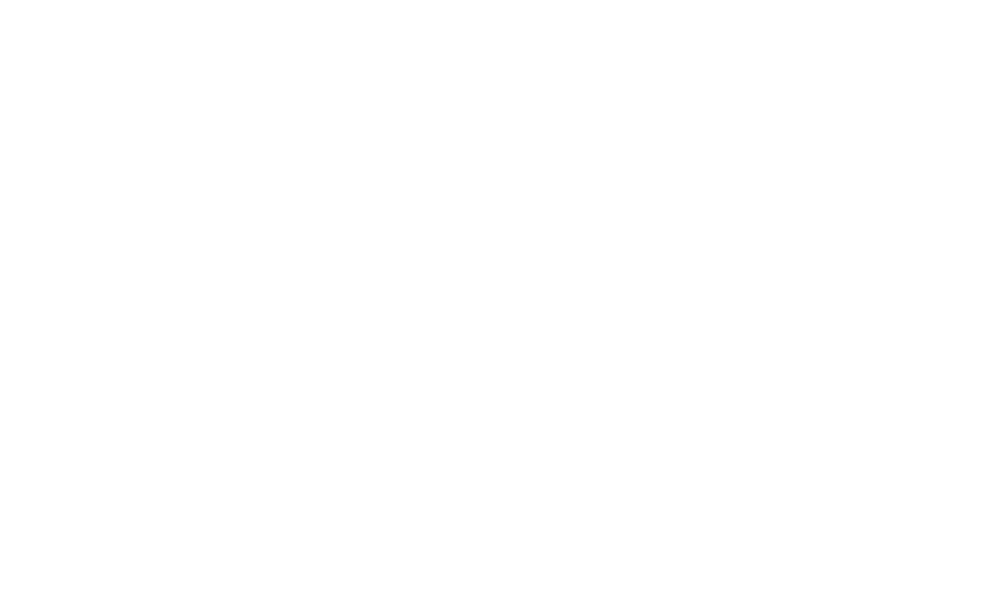

In [6]:
# Plot the distortion score elbow.
from yellowbrick.cluster import KElbowVisualizer

plt.figure(figsize=(10, 6))
model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(1, 12)).fit(X)
visualizer.show()